# **Employee Attrition Prediction**

## Introduction

In this notebook, we will analyze and predict employee attrition using the Employee Attrition & Performance dataset. Attrition, or employee turnover, is a critical metric for organizations as it affects operational efficiency and productivity. Our goal is to build predictive model to identify factors leading to employee attrition and evaluate various machine learning algorithms to predict whether an employee will leave the company.


# Data Visualisation

In [ ]:
# Import the required libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Load the dataset
df = pd.read_csv('../input/employee-attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv')


In [8]:
# Explore the dataset
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [22]:
# Statistical summary of the data
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [29]:
#Counts the occurrences of each unique value in the 'Attrition' column
attrition_count = pd.DataFrame(df['Attrition'].value_counts())

# Display the DataFrame with the attrition counts
attrition_count

,Attrition
No,1233
Yes,237


([<matplotlib.patches.Wedge at 0x7e4141f771d0>,
 [Text(-1.136781068348268, 0.6306574368426737, 'No'),
  Text(0.961891673217765, -0.5336332157899548, 'Yes')])

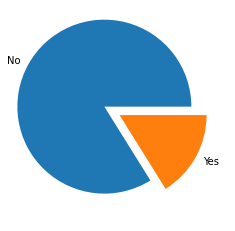

In [30]:
# Create a pie chart to visualize the distribution of attrition
plt.pie(attrition_count['Attrition'] , labels = ['No' , 'Yes'] , explode = (0.2,0))

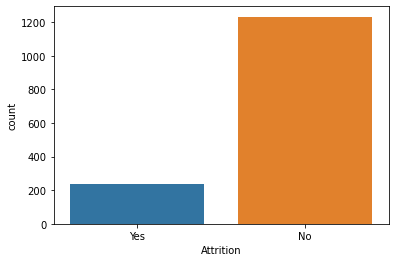

In [31]:
#Count plot to visualize the frequency of each category in the 'Attrition' column
sns.countplot(df['Attrition'])

In [33]:
# This will create two new columns: one for 'No' and one for 'Yes', representing attrition status
attrition_dummies = pd.get_dummies(df['Attrition'])

# Display the first 5 rows of the new DataFrame with the dummy variables
attrition_dummies.head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [34]:
# Concatenate the original DataFrame with the dummy variables for 'Attrition'
df = pd.concat([df, attrition_dummies] , axis = 1)

# Display the first 5 rows of the updated DataFrame
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No,Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0,8,0,1,6,4,0,5,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,1,10,3,3,10,7,1,7,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,0,7,3,3,0,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,0,8,3,3,8,7,3,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,1,6,3,3,2,2,2,2,1,0


In [35]:
# Drop the original 'Attrition' column and the 'No' dummy column from the DataFrame
df = df.drop(['Attrition' , 'No'] , axis = 1)

# Display the first 5 rows of the updated DataFrame
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,0


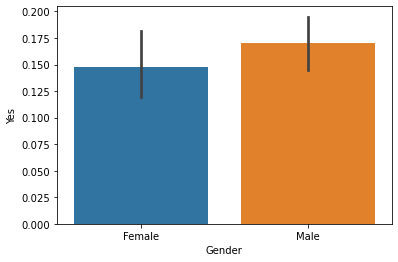

In [36]:
# Plot attrition by gender
sns.barplot(x = 'Gender' , y = 'Yes', data = df)

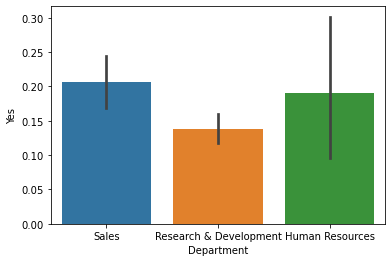

In [37]:
# Plot attrition by Department
sns.barplot(x = 'Department', y = 'Yes', data = df)

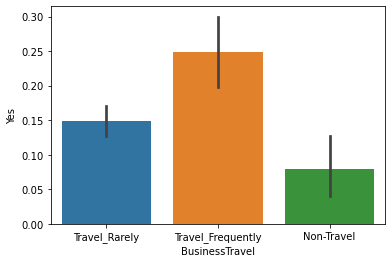

In [38]:
# Plot attrition by BusinessTravel
sns.barplot(x = 'BusinessTravel', y = 'Yes', data = df)

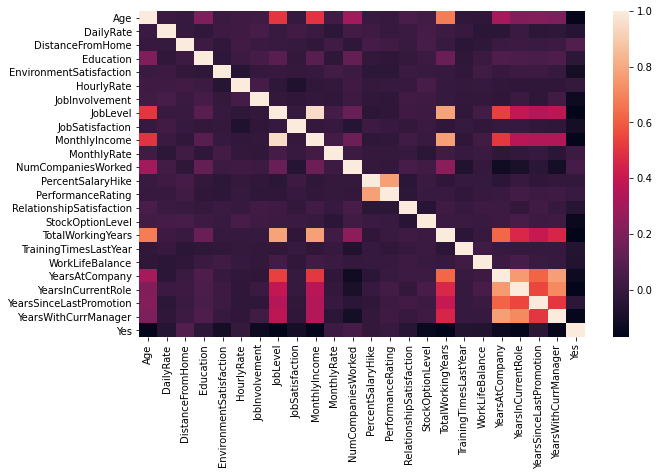

In [39]:
# Set figure size
plt.figure(figsize = (10,6))

# Plot correlation heatmap
sns.heatmap(df.corr())

# Data Preprocessing
Converting String columns into integers

In [44]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Encode non-numeric columns
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    else:
        df[column]=LabelEncoder().fit_transform(df[column])

# Model Building

In [46]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [47]:
# Features (excluding 'Yes')
x  = df.drop(['Yes'], axis = 1)

# Target variable ('Yes')
y = df['Yes']

In [48]:
# Split data into training and test sets
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [49]:
# Display first 5 rows of training features
x_train.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
338,2,295,2,4,2,2,3,0,0,1,...,0,2,3,10,2,2,10,9,1,2
363,2,159,2,4,2,2,3,0,4,2,...,0,1,0,1,2,2,1,0,0,0
759,2,437,0,23,3,3,1,1,6,2,...,0,0,0,6,3,2,6,3,0,4
793,2,502,1,14,1,1,0,1,20,2,...,0,3,1,4,5,1,4,2,2,2
581,2,516,1,0,2,1,3,1,8,0,...,1,2,2,7,2,2,2,2,0,2


In [50]:
# Train the RandomForest model
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [51]:
# Evaluate model accuracy on training data
rf.score(x_train, y_train)

0.9834791059280855

# Pedicting for x_test

In [52]:
# Make predictions on test data
pred = rf.predict(x_test)

In [53]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

In [54]:
# Calculate accuracy of predictions
accuracy_score(y_test, pred)

0.8639455782312925

# Accuracy for Tested Data = 85.26 %